
```Python Project - Marvel Mart Project
Tran Tran
March 12 2021```

## PART 1: Cleaning the Data

In [99]:
#import essential libraries
import csv 
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style='whitegrid', palette ='Set1')
pd.set_option('display.float_format', lambda x: '%.3f' % x) #round to 3 decimal places in any calculation

In [100]:
mm=pd.read_csv("Project II/MM_Sales.csv")
print(mm.count()-mm.shape[0]) #check for missing data ,item type misses 6 items, order priority misses 15 items
print(mm.dtypes)

Region             0
Country            0
Item Type         -6
Sales Channel      0
Order Priority   -15
Order Date         0
Order ID           0
Ship Date          0
Units Sold         0
Unit Price         0
Unit Cost          0
Total Revenue      0
Total Cost         0
Total Profit       0
dtype: int64
Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID           object
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object


In [101]:
dataCleaned=mm.copy() #make a copy from MM_Sales

In [102]:
#check for any data in Country which is not a string
count=0
for index, row in dataCleaned.iterrows():
    try:
        #try to convert each item as a float, if it fails, it's a string of word
        row.loc['Country']=float(row.loc['Country']) #convert to float
        dataCleaned.loc[int(index),'Country']='NULL' #if it's float, replaced it with NULL
        print(dataCleaned.loc[int(index),'Country']) #print the NULL value 
        count+=1
    except: #if it's a string, pass the value
        pass
print(f"Number of errors in Country: {count}")

NULL
NULL
NULL
Number of errors in Country: 3


In [103]:
#check for any data in Item Type which is not a string or missing
#Note: invalid Item Type in this case will have only one instance of that invalid Item Type. 
#Usually, a list of valid item types would be supplied.
count=0
for index, row in dataCleaned.iterrows():
    try:
        row.loc['Item Type']=float(row.loc['Item Type']) #convert each item to float
        #if it succeeds, it keeps going
        #once the data is found, replace it with NULL:
        dataCleaned.loc[int(index),'Item Type']='NULL'
        print(dataCleaned.loc[int(index),'Item Type']) #print the NULL value 
        count+=1
    except:  #if the value is string, pass it
        pass
print(f"Number of errors in Item Type: {count}")

NULL
NULL
NULL
NULL
NULL
NULL
Number of errors in Item Type: 6


In [104]:
#check for any data in Order Priority which is not a string or a valid priority code (C,H,M,L)
count=0
for index, row in dataCleaned.iterrows():
    try:
        row.loc['Order Priority']=float(row.loc['Order Priority']) #if it succeeds, it keeps going
        #once the data is found, replace it with NULL:
        dataCleaned.loc[int(index),'Order Priority']='NULL'
        print(dataCleaned.loc[int(index),'Order Priority']) #print the data that has been changed/replaced
        count+=1
    except: #if it's not a number, it's the string, we'll determine if it's C,H,M or L.
        if row.loc['Order Priority']!='C' and row.loc['Order Priority']!='H' and row.loc['Order Priority']!='M' and row.loc['Order Priority']!='L':
            dataCleaned.loc[int(index),'Priority']='NULL' #if it doesn't match C,H,M,L, change it to NULL
            print(dataCleaned.loc[int(index),'Priority']) #print the changed data
            count+=1
print(f"Number of errors in Order Priority: {count}")           

NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
Number of errors in Order Priority: 15


In [105]:
#check for any data in Order ID which is not a integer or missing
count=0
for index, row in dataCleaned.iterrows():
    try:
        #try to convert each item as a integer, if it fails, it's a string of word
        row.loc['Order ID']=int(row.loc['Order ID']) #convert to integer
    except:
        #if it's a string
        dataCleaned.loc[int(index),'Order ID']=0 #if it's error, replace it with 0
        print(dataCleaned.loc[int(index),'Order ID'])
        count+=1
print(f"Number of errors in Order ID: {count}")

0
0
0
0
0
Number of errors in Order ID: 5


In [106]:
#create a new dataframe with NULL/0 value in the columns that we've worked with, 
#drop all data with NULL/0 value while keep data that is not NULL/0
dataCleaned=dataCleaned[dataCleaned['Country']!='NULL']
dataCleaned=dataCleaned[dataCleaned['Item Type']!='NULL']
dataCleaned=dataCleaned[dataCleaned['Order Priority']!='NULL']
dataCleaned=dataCleaned[dataCleaned['Order ID']!=0]

In [107]:
#check for any NULL or O value in the 4 columns
print(dataCleaned['Country'][dataCleaned['Country']=='NULL'].count()) 
print(dataCleaned['Item Type'][dataCleaned['Item Type']=='NULL'].count()) 
print(dataCleaned['Order Priority'][dataCleaned['Order Priority']=='NULL'].count()) 
print(dataCleaned['Order ID'][dataCleaned['Order ID']==0].count()) 

0
0
0
0


In [108]:
print (dataCleaned.isnull().sum()) #check for missing values

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


In [109]:
dataCleaned.info()  #check the data type for each column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49971 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          49971 non-null  object 
 1   Country         49971 non-null  object 
 2   Item Type       49971 non-null  object 
 3   Sales Channel   49971 non-null  object 
 4   Order Priority  49971 non-null  object 
 5   Order Date      49971 non-null  object 
 6   Order ID        49971 non-null  object 
 7   Ship Date       49971 non-null  object 
 8   Units Sold      49971 non-null  int64  
 9   Unit Price      49971 non-null  float64
 10  Unit Cost       49971 non-null  float64
 11  Total Revenue   49971 non-null  float64
 12  Total Cost      49971 non-null  float64
 13  Total Profit    49971 non-null  float64
dtypes: float64(5), int64(1), object(8)
memory usage: 4.2+ MB


In [111]:
 #write it to a new cvs file
dataCleaned.to_csv("Project II/MM_Sales_clean.csv",mode='w',index=False)

## PART 2 : Exploratory Data Analysis with Reports & Visualizations

In [112]:

newMm=pd.read_csv('Project II/MM_Sales_clean.csv') #read it into a new variable

In [113]:
print(newMm.count()) #count the total rows

Region            49971
Country           49971
Item Type         49971
Sales Channel     49971
Order Priority    49971
Order Date        49971
Order ID          49971
Ship Date         49971
Units Sold        49971
Unit Price        49971
Unit Cost         49971
Total Revenue     49971
Total Cost        49971
Total Profit      49971
dtype: int64


- Question 1: We want to know which countries we sell the most so we can pick a new location to build a shipping center. Rank the Top 10 countries we sell to the most to least along with the number of sales we've had with that country.

In [114]:
rank=newMm.groupby('Country').count()[['Order ID']].nlargest(10, 'Order ID') 
#group and rank the top 10 countries to which we sel the most
#we are using Order ID because each Order ID is a unique transaction
print(rank)

                                  Order ID
Country                                   
Trinidad and Tobago                    321
Guinea                                 318
Cape Verde                             314
Maldives                               311
Finland                                310
Democratic Republic of the Congo       308
Samoa                                  306
Malta                                  305
China                                  303
South Sudan                            302


Q1-1/ Using Seaborn or Matplotlib to showing these top 10 values by country.

In [115]:
#preparing to plot, create a dataframe from the above result 
ranking = pd.DataFrame([['Trinidad and Tobago ',321], ['Guinea',318], ['Cape Verde',314], ['Maldives',311], ['Finland',310],['Democratic Republic of the Congo ',308],['Samoa',306],['Malta',305],['China',303],['South Sudan',302]], columns=['Country', 'Number of Transactions'])
print(ranking)

                             Country  Number of Transactions
0               Trinidad and Tobago                      321
1                             Guinea                     318
2                         Cape Verde                     314
3                           Maldives                     311
4                            Finland                     310
5  Democratic Republic of the Congo                      308
6                              Samoa                     306
7                              Malta                     305
8                              China                     303
9                        South Sudan                     302


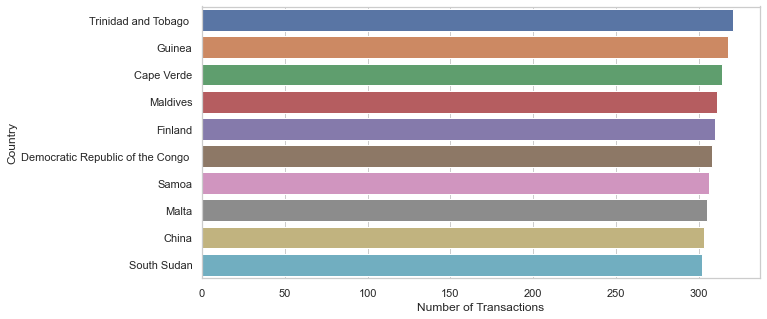

In [116]:

plt.figure(figsize=(10, 5)) #select figure size
sns.set(style='whitegrid') #select stype from seaborn library
sns.barplot(y = 'Country',x = 'Number of Transactions',data = ranking) #plot the barchart
plt.ylabel('Country') #add label for x axis
plt.xlabel('Number of Transactions') #add label for y axis
plt.show()

We have shipping centers in Trinidad and Tobago, Guinea, and Maldives.
Based on the number of transaction, Cape Verde has the third most sales. Thus, we should build a shipping center in this country


Q1-2/  Write the results to a text file called MM_Rankings.txt

In [117]:
#create a new txt file called MM_Ranking
with open("Project II/MM_Ranking.txt", "w+") as writer:
    writer.write("Countries Most Sale Transactions:")

In [118]:
#write the result to MM_Ranking using append 
with open("Project II/MM_Ranking.txt", "a+") as writer:
        writer.writelines("\nTrinidad and Tobago:321\nGuinea:318\nCape Verde:314\nMaldives:311\nFinland:310\nDemocratic Republic of the Congo:308\nSamoa:306\nMalta:305\nChina:303\nSouth Sudan:302")
        writer.writelines("\nThe country we should build our shipping center is Cape Verde because Cape Verde has the third most sales and there is still no shipping center.")

- Question 2: Determine how many online and offline orders that our company takes. Calculate the count of the different Order Priority types. Show this in a pie chart format

Q2-1/ Determine the count for how many online and offline orders we take.

In [119]:
orderChannel=newMm.groupby('Sales Channel').count()[['Order ID']] #sort and count online and offline orders by Order ID
print(orderChannel)

               Order ID
Sales Channel          
Offline           19788
Online            30183


Q2-2/Determine the count of the different Order Priority types.

In [120]:
orderType=newMm.groupby('Order Priority').count()[['Order ID']]#sort and count order priorities by Order ID
print(orderType)

                Order ID
Order Priority          
C                   5012
H                  15094
L                   9984
M                  19881


Q2-3/ Create a pie chart for each showing the differences in values (use Seaborn or Matplotlib).

In [124]:
#create a data frame from the Sales Channels sorting result to plot 
ocDf=pd.DataFrame([['Offline',19788],['Online',30183]],columns=['Sales Channel', 'Number of Sales'])
print(ocDf)

  Sales Channel  Number of Sales
0       Offline            19788
1        Online            30183


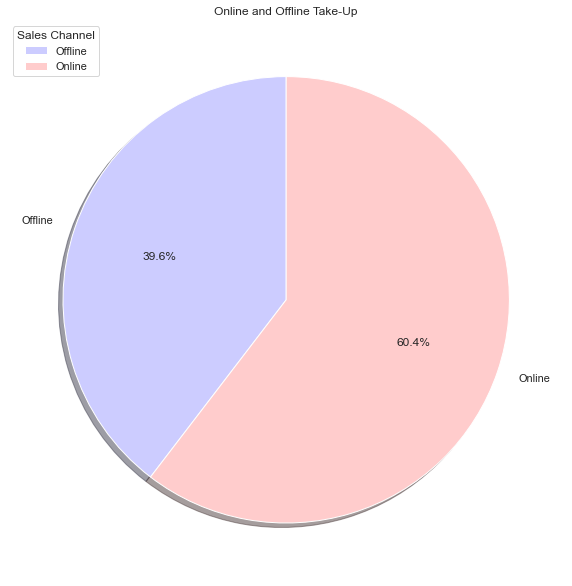

In [125]:
#plot a pie chart based on the above data frame
sales_channel = ocDf['Sales Channel']
number_of_sales = ocDf["Number of Sales"]
colors = ["#ccccff", "#ffcccc"]
plt.figure(figsize=(10, 15)) 
plt.pie(number_of_sales, labels=sales_channel, colors=colors, shadow=True,autopct='%1.1f%%', startangle=90) #set autopct to display the percentage value with 1 decimal place
plt.legend(loc=2, title='Sales Channel')
plt.title("Online and Offline Take-Up")
plt.show()

In [126]:
#create a data frame from the Order Priority sorting result to plot
otDf=pd.DataFrame([['C',5012],['H',15094],['L',9984],['M',19881]],columns=['Order Priority', 'Number of Sales'])
print(otDf)

  Order Priority  Number of Sales
0              C             5012
1              H            15094
2              L             9984
3              M            19881


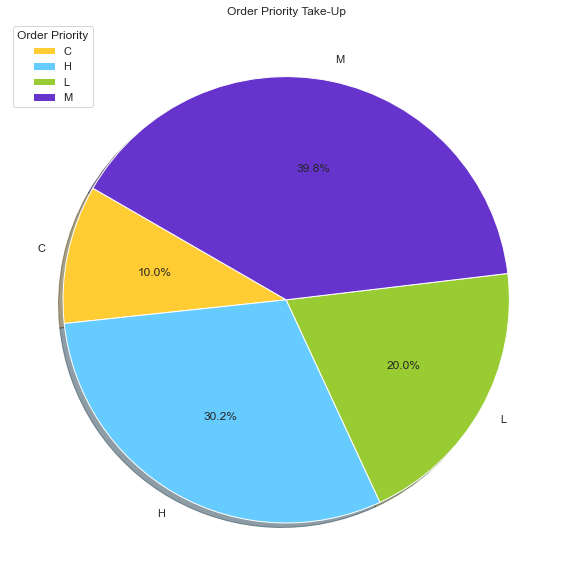

In [68]:
#plot a pie chart based on the above data frame
order_prior = otDf["Order Priority"]
number_of_sales = otDf["Number of Sales"]
colors = ["#ffcc33", "#66ccff","#99cc33","#6633cc"]
plt.figure(figsize=(10, 15)) 
plt.pie(number_of_sales, labels=order_prior, colors=colors, #et autopct to display the percentage value with 1 decimal place
autopct='%1.1f%%', shadow=True, startangle=150)
plt.legend(loc=2, title="Order Priority")
plt.title("Order Priority Take-Up")
plt.show()

Q2-4: Add the results of the highest sales channel type and the highest order priority to the file MM_Rankings.txt.

In [127]:
#write the result of Sales Channels to MM_Ranking
with open("Project II/MM_Ranking.txt", "a+") as writer:
        writer.writelines("\nSales Channels:")
        writer.writelines("\nOnline:30183\nOffline:19788")
        writer.writelines("\nWe do more Online sales.")
        

In [128]:
##write the result of Order Priorities to MM_Ranking
with open("Project II/MM_Ranking.txt", "a+") as writer:
        writer.writelines("\nOrder Prorities:")
        writer.writelines("\nL:9984\nM:19881\nH:15094\nC:5012")
        writer.writelines("\nWe do more M priorities.")
        

- Question 3: Finding the 3 item types which are providing the most profit.

Q3-1/ Create a Boxplot using Seaborn showing the Total Profits DISTRIBUTION by Item Type.

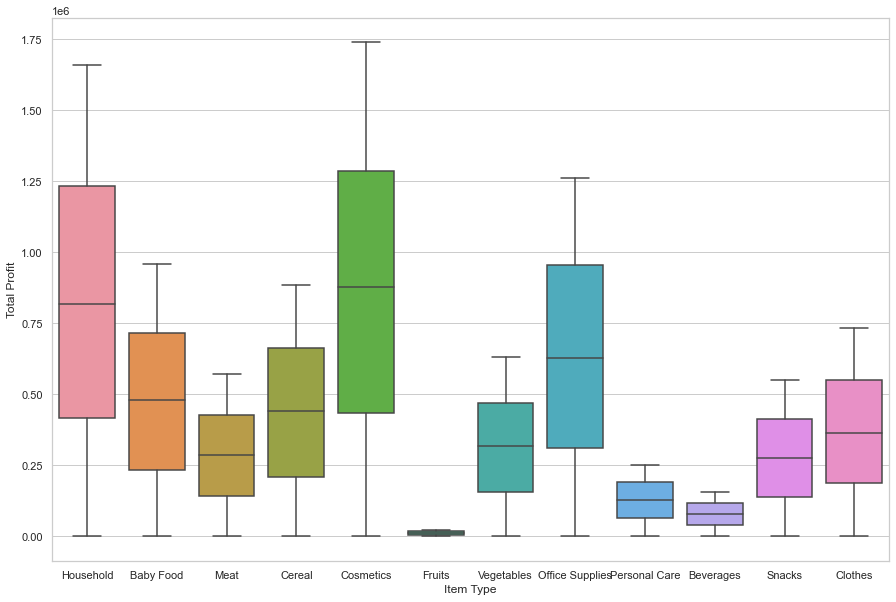

In [71]:
#Create a Boxplot using Seaborn showing the Total Profits DISTRIBUTION by Item Type.
plt.figure(figsize=(15,10))
ax=sns.boxplot(x="Item Type", y="Total Profit", data=newMm)

Q3-2/Use Python to determine the sum of Total Profit by Item Type.

In [72]:
#group the item type then find the sum of Total Profit
sumProDis = newMm.groupby('Item Type').sum()[['Total Profit']]
print(sumProDis)

                  Total Profit
Item Type                     
Baby Food       1942865748.120
Beverages        327559249.080
Cereal          1824726412.290
Clothes         1520832019.680
Cosmetics       3638407966.750
Fruits            51010570.920
Household       3401180998.060
Meat            1196342404.400
Office Supplies 2605440187.500
Personal Care    535250525.600
Snacks          1149715758.720
Vegetables      1322639660.240


Q3-3/Now create a chart type of your choice (Seaborn or Matplotlib) showing the sums of the different Item Types.

In [73]:
#create a dictionary from the above result
ProByType={'Item Types':['Baby Food','Beverages','Cereal','Clothes','Cosmestics',
        'Fruits','Household','Meat','Office Supplies',
        'Personal Care','Snacks','Vegetables'],'Sum Of Total Profit':[1942865748.120, 327559249.080, 1824726412.290, 1520832019.680,
                3638407966.750, 51010570.920, 3401180998.060, 1196342404.400,
                2605440187.500, 535250525.600, 1149715758.720, 1322639660.240]}
 #create a data frame from the dictionary         
proByType=pd.DataFrame(ProByType,columns=['Item Types','Sum Of Total Profit'])
print(proByType)

         Item Types  Sum Of Total Profit
0         Baby Food       1942865748.120
1         Beverages        327559249.080
2            Cereal       1824726412.290
3           Clothes       1520832019.680
4        Cosmestics       3638407966.750
5            Fruits         51010570.920
6         Household       3401180998.060
7              Meat       1196342404.400
8   Office Supplies       2605440187.500
9     Personal Care        535250525.600
10           Snacks       1149715758.720
11       Vegetables       1322639660.240


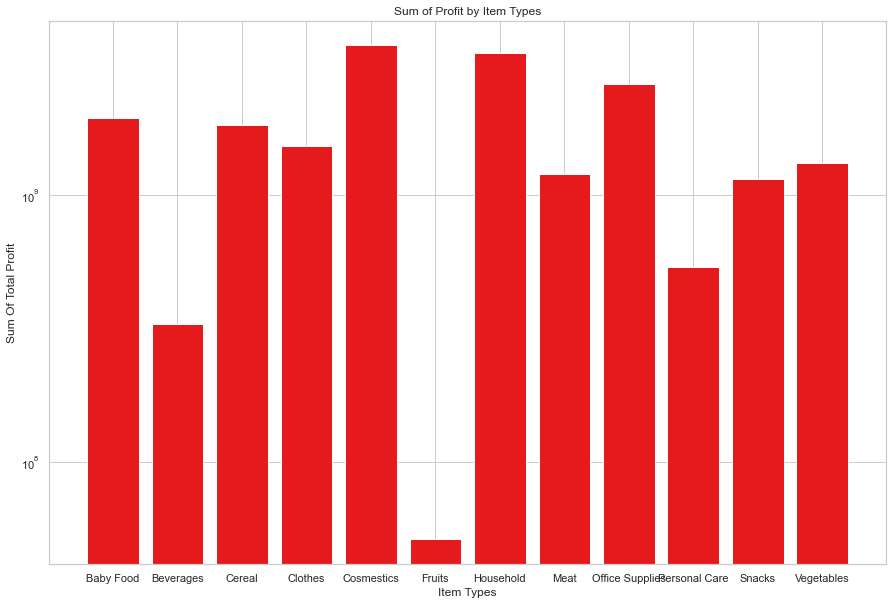

In [76]:
#plot a bar chart showing the sums of the different Item Types
x=proByType['Item Types'] #assign Item Types as variable x
y=proByType['Sum Of Total Profit']#assign Sum Of Total Profit as variable y
plt.figure(figsize=(15, 10)) #set a figure size
plt.yscale('log')
plt.title('Sum of Profit by Item Types') #add title
plt.xlabel('Item Types') #add label for x axis
plt.ylabel('Sum Of Total Profit') #add label for y axis
plt.bar(x, y) #select type of visualization
plt.show()

Q3-4: Now, using Python, rank the top 3 item types we did the most sales (brought in most profit) in to the least sales. (Use 'Total Profit' to determine this).  Please list the item types and the amount of profit made from sales.

In [77]:
#using nlargest to get the top 3 largest Sum of Total Profit
cal=proByType.groupby('Item Types').sum()[['Sum Of Total Profit']].nlargest(3, 'Sum Of Total Profit') 
proRank=pd.DataFrame(cal)
print(proRank)

                 Sum Of Total Profit
Item Types                          
Cosmestics            3638407966.750
Household             3401180998.060
Office Supplies       2605440187.500


Q3-5: Add the results of the top 3 item types to the file MM_Rankings.txt.

In [129]:
#write the results to MM_Rankings
with open("Project II/MM_Ranking.txt", "a+") as writer:
        writer.writelines("\nHighest Selling Items:")
        writer.writelines("\nCosmestics:3638407966.750\nHousehold:3401180998.060\nOffice Supplies: 2605440187.500")
        writer.writelines("\nWe profited from Cosmetic the most.")

Q3-6: Provide a markdown section discussing the results of the boxplots. Discuss what is being shown in the boxplots amd do some business analytics around what sort of use this sort of chart might help in making decisions. Are there any unexpected results? Discuss them.

There's no outliers observed in the boxplot. We can asssume that there is little dispersed profit data among all the Item Types. Cosmetic is the Item Type that bring the most profit while Fruits bring the least. All the boxplots are normally distributed, the median of each item varies. 
Fruit, Personal Care, Meat and Beverages have the smaller area. This means these item types do not significantly contribute to the profit of our company.
On the contrary, Household, Cosmetic and Office Supplies have the largest area. These item types bring most of our profit. 
In conclusion, the item types belonged to Food and Beverage Industry bring the least profit while we gain more profit from the supplying products , thus we should focus on the item types that are the most profitable. It's better to review the cost and profit from the item type Fruit. 
There's no unexpected result as there's no outlier. 

- Question 4: Determine some descriptive statistic. determine the sum, average and maximum values for the Units Sold, Unit Cost, Total Revenue, Total Cost and Total Profit.


In [79]:
#create a new txt file named MM_Calc
with open("Project II/MM_Calc.txt", "w+") as writer:
    writer.write("Sums:")

In [80]:
#calculate the SUM of each requested columns, print and round the result to 3 decimal places
totalUS=newMm['Units Sold'].sum()
totalUC=newMm['Unit Cost'].sum()
totalRev=newMm['Total Revenue'].sum()
totalCost=newMm['Total Cost'].sum()
totalProfit=newMm['Total Profit'].sum()
print(round(totalUS,3))
print(round(totalUC,3))
print(round(totalRev,3))
print(round(totalCost,3))
print(round(totalProfit,3))

249818150
9360768.32
66145004417.17
46629032915.81
19515971501.36


In [81]:
#write the result to MM_Calc
with open("Project II/MM_Calc.txt", "a+") as writer:
    writer.writelines("\nUnits Sold:249818150\nUnit Cost:9360768.32\nTotal Revenue:66145004417.17\nTotal Cost:46629032915.81\nTotal Profit:19515971501.36")

In [82]:
##calculate the AVERAGE of each requested columns, print and round the result to 3 decimal places
avgUS=newMm['Units Sold'].mean()
avgUC=newMm['Unit Cost'].mean()
avgRev=newMm['Total Revenue'].mean()
avgCost=newMm['Total Cost'].mean()
avgProfit=newMm['Total Profit'].mean()
print(round(avgUS,3))
print(round(avgUC,3))
print(round(avgRev,3))
print(round(avgCost,3))
print(round(avgProfit,3))

4999.263
187.324
1323667.816
933121.869
390545.947


In [83]:
#write the result to MM_Calc
with open("Project II/MM_Calc.txt", "a+") as writer:
    writer.writelines('\nAverages:\nUnits Sold:4999.263\nUnit Cost:187.324\nTotal Revenue:1323667.816\nTotal Cost:933121.869\nTotal Profit:390545.947')

In [84]:
##calculate the MAX of each requested columns, print and round the result to 3 decimal places
maxUS=newMm['Units Sold'].max()
maxUC=newMm['Unit Cost'].max()
maxRev=newMm['Total Revenue'].max()
maxCost=newMm['Total Cost'].max()
maxProfit=newMm['Total Profit'].max()
print(round(maxUS,3))
print(round(maxUC,3))
print(round(maxRev,3))
print(round(maxCost,3))
print(round(maxProfit,3))

10000
524.96
6682031.73
5249075.04
1738178.39


In [85]:
#write the result to MM_Calc
with open("Project II/MM_Calc.txt", "a+") as writer:
    writer.writelines('\nMaximums:\nUnits Sold:10000\nUnit Cost:524.96\nTotal Revenue:6682031.73\nTotal Cost:5249075.04\nTotal Profit:1738178.39')

In [86]:
#create a data frame from the SUM calculation to plot
sum=pd.DataFrame([['Units Sold',249818150],['Unit Cost',9360768.32],['Total Revenue ',66145004417.17],['Total Cost',46629032915.81],['Total Profit',19515971501.36]],columns=['Stat', 'Total'])
print(sum)

             Stat           Total
0      Units Sold   249818150.000
1       Unit Cost     9360768.320
2  Total Revenue  66145004417.170
3      Total Cost 46629032915.810
4    Total Profit 19515971501.360


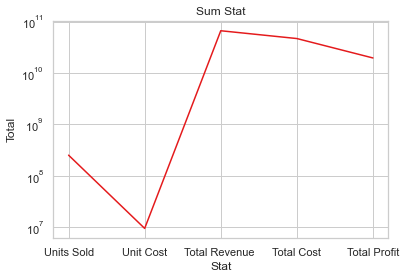

In [87]:
#create a line plot for the sum
sns.lineplot(x="Stat", y="Total", data=sum) 
plt.yscale('log') 
plt.title('Sum Stat')
plt.show()

In [88]:
#create a data from the Average and Max calculation to plot a graph for both the averages and the maximums.

avg_max = pd.DataFrame({
    'Average': [4999.263, 187.323, 1323667.810, 933121.869, 390545.947],
    'Maximum': [10000, 524.96, 6682031.73, 5249075.04, 1738178.39],
   }, index=['Unit Sold', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'])
print(avg_max)

                  Average     Maximum
Unit Sold        4999.263   10000.000
Unit Cost         187.323     524.960
Total Revenue 1323667.810 6682031.730
Total Cost     933121.869 5249075.040
Total Profit   390545.947 1738178.390


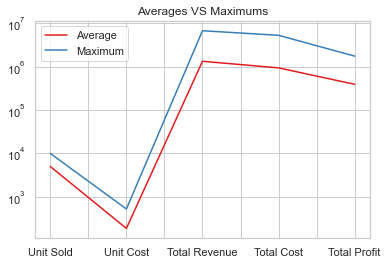

In [89]:
# Create two line plots from the above data frame.
fig = avg_max.plot.line()
plt.title('Averages VS Maximums')
plt.yscale('log')

## PART 3: Cross-Reference Statistics

- Question 1. Get a list of the Regions and then the countries we sell to in that region.

In [91]:
regCountr = newMm.groupby(['Region'])['Country'].unique().apply(list).to_dict() #create a dictionary with unique Countries grouped by Region
print(regCountr)

{'Asia': ['Indonesia', 'India', 'South Korea', 'Kazakhstan', 'Mongolia', 'Malaysia', 'Singapore', 'Brunei', 'Kyrgyzstan', 'Taiwan', 'Sri Lanka', 'North Korea', 'Cambodia', 'Tajikistan', 'Turkmenistan', 'Maldives', 'Laos', 'Myanmar', 'Bhutan', 'Vietnam', 'Japan', 'Philippines', 'China', 'Bangladesh', 'Uzbekistan', 'Thailand', 'Nepal'], 'Australia and Oceania': ['Tuvalu', 'Samoa ', 'Fiji', 'Marshall Islands', 'New Zealand', 'Solomon Islands', 'Vanuatu', 'Australia', 'Papua New Guinea', 'Nauru', 'Kiribati', 'Tonga', 'Palau', 'East Timor', 'Federated States of Micronesia'], 'Central America and the Caribbean': ['Antigua and Barbuda ', 'Saint Kitts and Nevis ', 'Saint Lucia', 'Trinidad and Tobago', 'Guatemala', 'Saint Vincent and the Grenadines', 'Jamaica', 'Grenada', 'Honduras', 'Belize', 'Barbados', 'El Salvador', 'Dominican Republic', 'The Bahamas', 'Cuba', 'Nicaragua', 'Costa Rica', 'Panama', 'Dominica', 'Haiti'], 'Europe': ['Iceland', 'Russia', 'Moldova ', 'Malta', 'Greece', 'Ukraine',

- Question 2: Write this out to a CSV file called Countries_By_Region.csv

In [92]:
regC = pd.DataFrame.from_dict(regCountr, orient='index').transpose()
regC.to_csv("Project II/Countries_By_Region.csv",mode='w',index=False)